### PROJECT-GENDER RECOGNITION BY VOICE-(CSE-221710315014-G NIKHILA

### PROBLEM STATEMENT:RECOGNIZING THE GENDER OF A PERSON BASED ON THEIR VOICE

### IMPORTING THE PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns

### READING THE DATASET
.  To import the dataset we use pandas package-reads the dataset

In [2]:
import warnings # to remove warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
#CHECK THE DATASET INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.9+ KB


In [4]:
#check the data using describe()
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [5]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


### HANDLING MISSING VALUES

### CHECKING FOR THE NULL VALUES

In [6]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [7]:
print("Null values present in data: {}".format(df.isnull().values.any()))

Null values present in data: False


In [8]:
## PRINTING THE COLUMN NAMES
print(df.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


### DESCRIBING THE COLUMNS
##### meanfreq : mean frequency (in kHz)
##### sd : standard deviation of frequency
##### median : median frequency (in kHz)
##### Q25 : first quantile (in kHz)
##### Q75 : third quantile (in kHz)
##### IQR : interquantile range (in kHz)
##### skew : skewness (see note in specprop description)
##### kurt : kurtosis (see note in specprop description)
##### sp.ent : spectral entropy
##### sfm : spectral flatness
##### mode : mode frequency
##### centroid : frequency centroid (see specprop)
##### peakf : peak frequency (frequency with highest energy)
##### meanfun : average of fundamental frequency measured across acoustic signal
##### minfun : minimum fundamental frequency measured across acoustic signal
##### maxfun : maximum fundamental frequency measured across acoustic signal
##### meandom : average of dominant frequency measured across acoustic signal
##### mindom : minimum of dominant frequency measured across acoustic signal
##### maxdom : maximum of dominant frequency measured across acoustic signal
##### dfrange : range of dominant frequency measured across acoustic signal
##### modindx : modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
##### label : male or female

In [9]:
#DATA FRAME
df.shape

(3168, 21)

In [10]:
#DATATYPE OF LABEL
df.label.dtype

dtype('O')

In [11]:
type(df.label[0])

str

### PREPROCESSING THE DATASET

In [12]:
df.dtypes.value_counts()

float64    20
object      1
dtype: int64

In [13]:
df.columns.value_counts()

sd          1
meanfun     1
minfun      1
IQR         1
centroid    1
mode        1
label       1
sfm         1
meanfreq    1
maxfun      1
median      1
maxdom      1
kurt        1
mindom      1
dfrange     1
sp.ent      1
Q25         1
Q75         1
modindx     1
skew        1
meandom     1
dtype: int64

In [14]:
df['dfrange'].value_counts()

0.000000    65
5.132812    15
0.625000    15
0.679688    14
3.750000    13
            ..
2.156250     1
1.976562     1
4.742188     1
5.234375     1
3.256836     1
Name: dfrange, Length: 1091, dtype: int64

In [15]:
# Checking the occurances(or) frequency of the values in a particular column
df['label'].value_counts()  # Mode

male      1584
female    1584
Name: label, dtype: int64

### PREPROCESSING : USING LABELENCODER AND NORMALIZATION

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["label"] = le.fit_transform(df["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [17]:
df[:]=preprocessing.MinMaxScaler().fit_transform(df)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


### VIZUALIZING THE CORRELATION

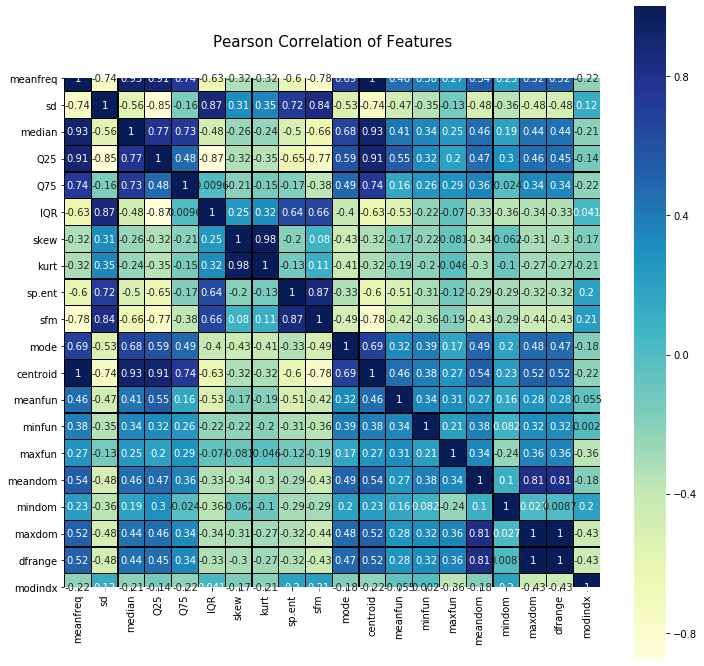

In [18]:
colormap=df.corr()
plt.figure(figsize=(12,12))
plt.title('correlation of features', y=1.05, size=15)
sns.heatmap(df.iloc[:,:-1].astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="YlGnBu", linecolor='black', annot=True)
plt.show()

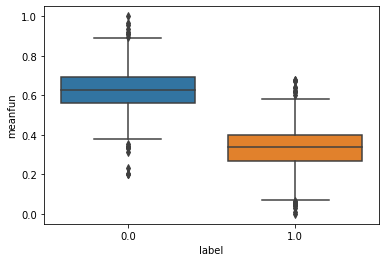

In [19]:
#0->female,1->male
sns.boxplot(x="label",y="meanfun",data=df)
plt.show()

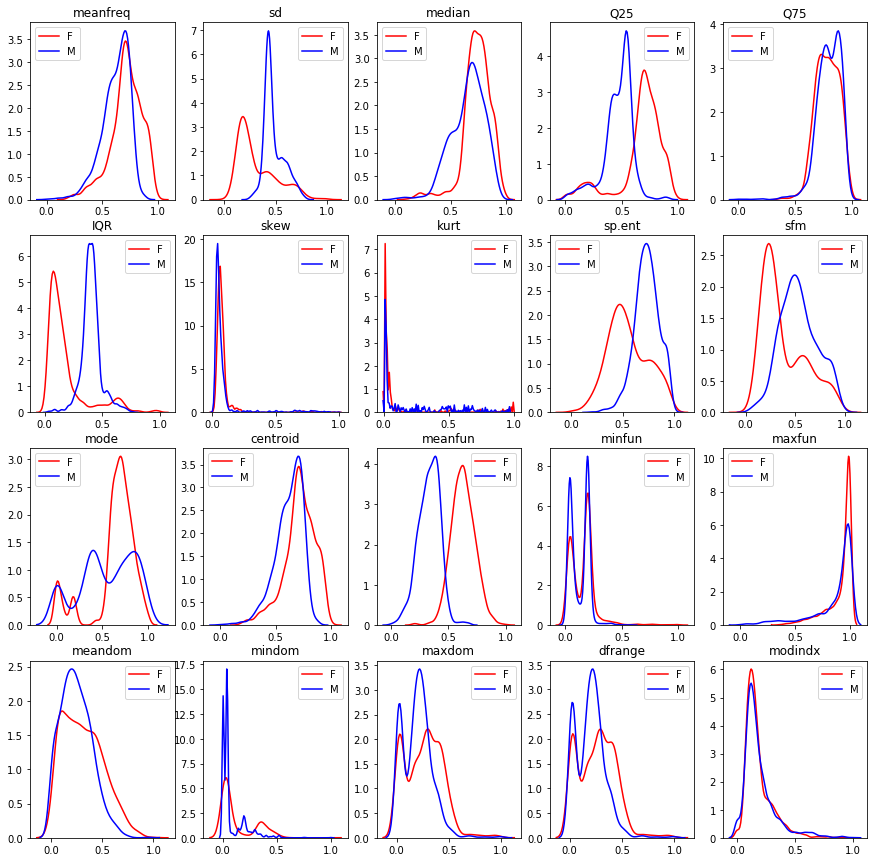

In [20]:
#VIZUALIZATION
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(df.columns[i-1])
    sns.kdeplot(df.loc[df['label'] == 0, df.columns[i-1]], color= 'red', label='F')
    sns.kdeplot(df.loc[df['label'] == 1, df.columns[i-1]], color= 'blue', label='M')

At first glance, most of the significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features.

### SPLITTING THE DATA SET INTO TRAINING AND TESTING DATA


In [21]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
# Split the data and printing the train data
train, test = train_test_split(df, test_size=0.3)
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1441,0.653749,0.433955,0.672771,0.563893,0.776964,0.285776,0.030659,0.001589,0.782925,0.551941,...,0.653749,0.262953,0.191170,0.999749,0.217687,0.040860,0.228020,0.227468,0.127321,1.0
74,0.461523,0.498090,0.367229,0.343285,0.668890,0.410331,0.113825,0.018045,0.713244,0.584336,...,0.461523,0.140601,0.035467,0.904450,0.063562,0.006452,0.098999,0.099070,0.049401,1.0
1667,0.378746,0.728100,0.336512,0.141269,0.728290,0.677995,0.039673,0.002905,0.927291,0.881619,...,0.378746,0.749150,0.035557,0.981526,0.294822,0.006452,0.247320,0.247496,0.202779,0.0
2669,0.758975,0.146179,0.729642,0.725825,0.783608,0.123849,0.073674,0.007024,0.363318,0.187057,...,0.758975,0.680455,0.236273,0.999749,0.397874,0.040860,0.382416,0.381974,0.127674,0.0
2635,0.806470,0.203044,0.779987,0.752916,0.843548,0.153819,0.047876,0.003229,0.502467,0.230701,...,0.806470,0.537855,0.191407,0.999749,0.377621,0.040860,0.392066,0.391631,0.142606,0.0


In [23]:
X_train = train.iloc[:, :-1]
y_train = train["label"]
X_test = test.iloc[:, :-1]
y_test = test["label"]

In [24]:
#only by using meanfun,IQR,Q25
X_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
X_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [25]:
y_train.value_counts(normalize = True)

1.0    0.503383
0.0    0.496617
Name: label, dtype: float64

In [26]:
y_test.value_counts(normalize = True)

0.0    0.507886
1.0    0.492114
Name: label, dtype: float64

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2217, 20)
(2217,)
(951, 20)
(951,)


In [28]:
print(X_test3)
print(X_train3)
print(y_train3)
print(y_test3)

       meanfun       IQR       Q25
2107  0.708823  0.042048  0.725274
2546  0.590848  0.108384  0.733992
1394  0.422594  0.325720  0.627634
1979  0.743537  0.098716  0.782789
2561  0.620822  0.063699  0.730128
...        ...       ...       ...
1478  0.355100  0.300628  0.639634
2909  0.545589  0.142497  0.792605
1003  0.393823  0.438973  0.551504
1943  0.573350  0.131250  0.730380
2611  0.741215  0.036369  0.884612

[951 rows x 3 columns]
       meanfun       IQR       Q25
1441  0.262953  0.285776  0.563893
74    0.140601  0.410331  0.343285
1667  0.749150  0.677995  0.141269
2669  0.680455  0.123849  0.725825
2635  0.537855  0.153819  0.752916
...        ...       ...       ...
1245  0.390726  0.448893  0.524974
327   0.247441  0.378238  0.407415
2954  0.624800  0.824955  0.036507
3056  0.827745  0.065918  0.800943
1888  0.606548  0.178444  0.732099

[2217 rows x 3 columns]
1441    1.0
74      1.0
1667    0.0
2669    0.0
2635    0.0
       ... 
1245    1.0
327     1.0
2954    0.0
305

In [30]:
def classify(model,X_train,y_train,X_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [31]:
print(y_test)

2107    0.0
2546    0.0
1394    1.0
1979    0.0
2561    0.0
       ... 
1478    1.0
2909    0.0
1003    1.0
1943    0.0
2611    0.0
Name: label, Length: 951, dtype: float64


In [32]:
print(y_train)

1441    1.0
74      1.0
1667    0.0
2669    0.0
2635    0.0
       ... 
1245    1.0
327     1.0
2954    0.0
3056    0.0
1888    0.0
Name: label, Length: 2217, dtype: float64


### APPLYING ALGORITHMS

### K-Nearest Neighbors
- Using neighbors.KNeighborsClassifier() to build the model.

In [33]:
#IMPORTING THE KNN PACKAGE
from sklearn import neighbors

In [34]:
def knn_error(k,X_train,y_train,X_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))
    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.01892744479495268 occurs at k=1.


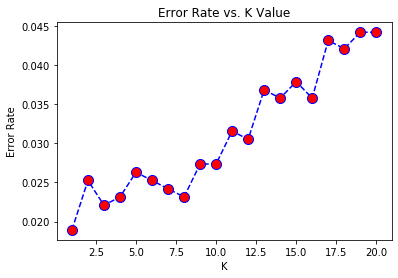

              precision    recall  f1-score   support

      female     0.9854    0.9772    0.9813       483
        male     0.9767    0.9850    0.9809       468

    accuracy                         0.9811       951
   macro avg     0.9810    0.9811    0.9811       951
weighted avg     0.9811    0.9811    0.9811       951



In [35]:
k=knn_error(21,X_train,y_train,X_test,y_test)
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,X_train,y_train,X_test,y_test)

Lowest error is 0.025236593059936908 occurs at k=4.


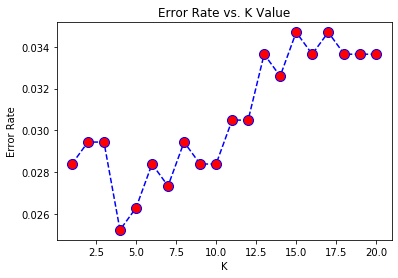

              precision    recall  f1-score   support

      female     0.9772    0.9772    0.9772       483
        male     0.9765    0.9765    0.9765       468

    accuracy                         0.9769       951
   macro avg     0.9769    0.9769    0.9769       951
weighted avg     0.9769    0.9769    0.9769       951



In [36]:
k=knn_error(21,X_train3,y_train3,X_test3,y_test3)
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,X_train,y_train,X_test,y_test)

### Naive Bayes
. Using naive_bayes.GaussianNB() to build the model.

In [37]:
from sklearn import naive_bayes 

In [38]:
model=naive_bayes.GaussianNB()
classify(model,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

      female     0.9055    0.8923    0.8989       483
        male     0.8905    0.9038    0.8971       468

    accuracy                         0.8980       951
   macro avg     0.8980    0.8981    0.8980       951
weighted avg     0.8981    0.8980    0.8980       951



In [39]:
model=naive_bayes.GaussianNB()
classify(model,X_train3,y_train3,X_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9746    0.9545    0.9644       483
        male     0.9540    0.9744    0.9641       468

    accuracy                         0.9642       951
   macro avg     0.9643    0.9644    0.9642       951
weighted avg     0.9645    0.9642    0.9643       951



### Random forest
- Using ensemble.RandomForestClassifier() to build the model

In [40]:
#importing the ensemble package
from sklearn import ensemble

In [41]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.014721345951629864 occurs at n=41.


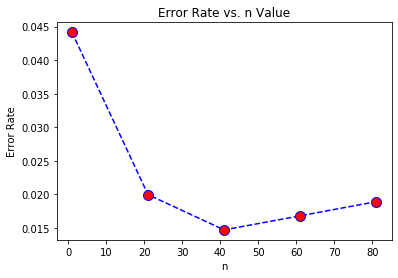

              precision    recall  f1-score   support

      female     0.9814    0.9834    0.9824       483
        male     0.9829    0.9808    0.9818       468

    accuracy                         0.9821       951
   macro avg     0.9821    0.9821    0.9821       951
weighted avg     0.9821    0.9821    0.9821       951



In [42]:
e=rf_error(100,X_train,y_train,X_test,y_test)
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,X_train,y_train,X_test,y_test)

Lowest error is 0.028391167192429023 occurs at n=61.


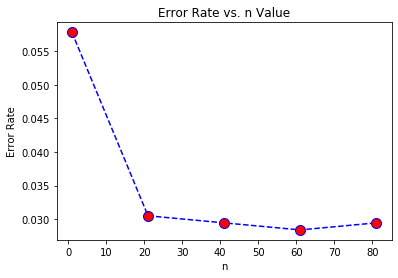

              precision    recall  f1-score   support

      female     0.9750    0.9689    0.9720       483
        male     0.9682    0.9744    0.9712       468

    accuracy                         0.9716       951
   macro avg     0.9716    0.9717    0.9716       951
weighted avg     0.9716    0.9716    0.9716       951



In [43]:
e=rf_error(100,X_train3,y_train3,X_test3,y_test3)
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,X_train3,y_train3,X_test3,y_test3)

### XgBoost
- Using xgboost.XGBClassifier() to build the model.

In [44]:
#importing the xgboost package
import xgboost

In [45]:
model = xgboost.XGBClassifier()
classify(model,X_train,y_train,X_test,y_test)

              precision    recall  f1-score   support

      female     0.9833    0.9752    0.9792       483
        male     0.9746    0.9829    0.9787       468

    accuracy                         0.9790       951
   macro avg     0.9789    0.9790    0.9790       951
weighted avg     0.9790    0.9790    0.9790       951



In [46]:
model = xgboost.XGBClassifier()
classify(model,X_train3,y_train3,X_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9770    0.9689    0.9730       483
        male     0.9682    0.9765    0.9723       468

    accuracy                         0.9727       951
   macro avg     0.9726    0.9727    0.9727       951
weighted avg     0.9727    0.9727    0.9727       951



#### CONCLUSION:By using random forest im getting 98% accuracy.so i can conclude that random forest is the best algorithm